In [1]:
import re
import os
import sys
import argparse
import numpy as np
import tensorflow as tf

kbT = (8.617343E-5) * 300
beta = 1.0 / kbT
f_cvt = 96.485
cv_dim = 27

def load_graph(frozen_graph_filename,
               prefix = 'load'):
    # We load the protobuf file from the disk and parse it to retrieve the 
    # unserialized graph_def
    with tf.gfile.GFile(frozen_graph_filename, "rb") as f:
        graph_def = tf.GraphDef()
        graph_def.ParseFromString(f.read())

    # Then, we can use again a convenient built-in function to import a graph_def into the 
    # current default Graph
    with tf.Graph().as_default() as graph:
        tf.import_graph_def(
            graph_def,
            input_map=None,
            return_elements=None,
            name=prefix,
            op_dict=None,
            producer_op_list=None
        )
    return graph

def test_ef (sess, xx) :
    graph = sess.graph

    inputs  = graph.get_tensor_by_name ('load/inputs:0')
    o_energy= graph.get_tensor_by_name ('load/o_energy:0')
    o_forces= graph.get_tensor_by_name ('load/o_forces:0')

    zero4 = np.zeros ([xx.shape[0], cv_dim])
    data_inputs = np.concatenate ((xx, zero4), axis = 1)
    feed_dict_test = {inputs: data_inputs}

    data_ret = sess.run ([o_energy, o_forces], feed_dict = feed_dict_test)
    return data_ret[0], data_ret[1]


In [41]:
import glob
dirname='rid_p53.run.run.03.wall.1.2'
ave_ene=[]
for it in range(0,8):
    for en in range(26,27):
        trjdir='/scratch/gpfs/hsinyu/linfengz/rid/%s/iter.%06d/00.enhcMD/%03d/' %(dirname,it,en)
        models = glob.glob('/scratch/gpfs/hsinyu/linfengz/rid/rid_p53.run.run.03.wall.1.2/iter.000012/00.enhcMD/000/*.pb')
        data_ = np.loadtxt (trjdir+'angle.rad.out')
        data = data_[:,:cv_dim]
        nframes = data.shape[0]
        energys = []
        for ii in models :
            graph = load_graph (ii)
            with tf.Session(graph = graph) as sess:
                ee, ff = test_ef (sess, data)
                forces = np.append (forces, ff)
                energys = np.append (energys, ee)
                # if len(forces) == 0 :
                #     forces = np.array ([ff])
                # else :
                #     forces = np.concatenate (forces, np.array([ff]))
        #forces = np.reshape (forces, [len(models), nframes, cv_dim])
        energys = np.reshape (energys, [len(models), nframes])

    ave_ene=np.append(ave_ene,-np.mean(energys,axis=0))
print(ave_ene)
print(len(ave_ene))

[-0.01703871 -3.39039539 -3.38709518 ... -3.83445216 -3.57740504
 -3.82502556]
8008


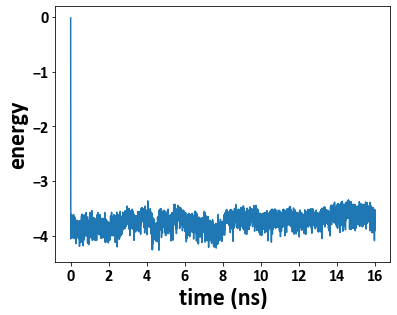

In [42]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=24)
leg_prop = font_manager.FontProperties(fname=font_path, size=17)

time = np.arange(len(ave_ene))*0.002
#for i in range(len(clustered_trajs)):

fig, ax = plt.subplots(figsize=(6,4.7))
ax.plot(time,ave_ene)
ax.set_ylabel(r'energy',fontproperties=font_prop)
ax.set_xlabel('time (ns)',fontproperties=font_prop)
#plt.ylim(0,0.5)
#plt.xlim(0,180)
#leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
#leg.get_frame().set_linewidth(0.0)
#leg.get_frame().set_alpha(0.1)
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontproperties(font_prop)
    label.set_fontsize(16)
plt.show()

0
11011
1
11011
2
11011
3
11011
4
11011
5
11011
6
11011
7
11011
8
11011
9
11011
10
11011
11
11011
12
11011
13
11011
14
11011
15
11011
16
11011
17
11011
18
11011
19
11011
20
11011
21
11011
22
11011
23
11011
24
11011
25
11011
26
11011
27
11011
28
11011
29
11011


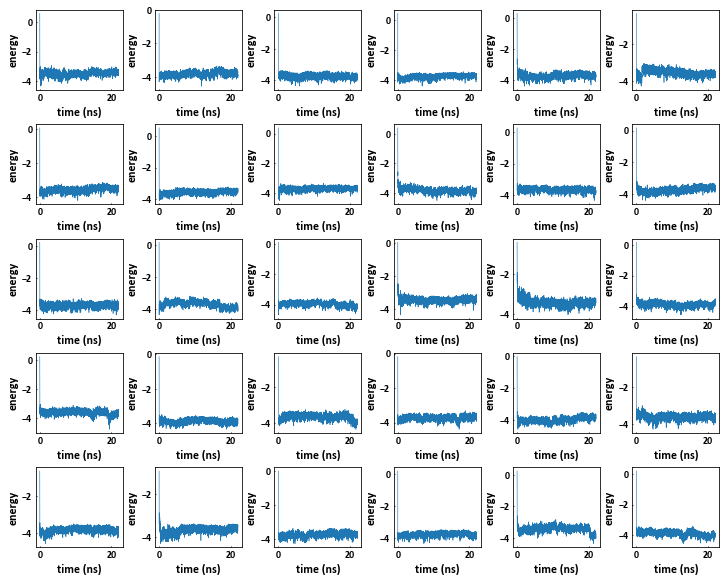

In [49]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
font_path = '/home/dongdong/tigress/calibribold.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=12)
leg_prop = font_manager.FontProperties(fname=font_path, size=10)
fig = plt.figure(figsize=(10,8))

dirname='rid_p53.run.run.03.wall.1.2'
num_walkers=30
for en in range(30):
    ave_ene=[]
    print(en)
    for it in range(0,11):
        trjdir='/scratch/gpfs/hsinyu/linfengz/rid/%s/iter.%06d/00.enhcMD/%03d/' %(dirname,it,en)
        models = glob.glob('/scratch/gpfs/hsinyu/linfengz/rid/rid_p53.run.run.03.wall.1.2/iter.000012/00.enhcMD/000/*.pb')
        data_ = np.loadtxt (trjdir+'angle.rad.out')
        data = data_[:,:cv_dim]
        nframes = data.shape[0]
        energys = []
        for ii in models :
            graph = load_graph (ii)
            with tf.Session(graph = graph) as sess:
                ee, ff = test_ef (sess, data)
                forces = np.append (forces, ff)
                energys = np.append (energys, ee)
                # if len(forces) == 0 :
                #     forces = np.array ([ff])
                # else :
                #     forces = np.concatenate (forces, np.array([ff]))
        #forces = np.reshape (forces, [len(models), nframes, cv_dim])
        energys = np.reshape (energys, [len(models), nframes])

        ave_ene=np.append(ave_ene,-np.mean(energys,axis=0))
    print(len(ave_ene))
    sub = fig.add_subplot(int(num_walkers)/6,6,en+1)
    time = np.arange(len(ave_ene))*0.002
    sub.plot(time,ave_ene,lw=0.6)
    sub.set_ylabel(r'energy',fontproperties=font_prop)
    sub.set_xlabel(r'time (ns)',fontproperties=font_prop)
    #sub.plot(np.array(range(len(allrmsd)))/1000.0*4,[0.15]*len(allrmsd),lw=0.8)
    sub.tick_params(direction="in", length=1)
    #plt.ylim(0.1,1.3)
    #plt.xlim(25,55)
    #ax.set_yticks(np.linspace(0,2,5))
    #ax.set_yticklabels([0,0.5,1,2])
    #leg=plt.legend(loc=1, labelspacing=0.1, prop=leg_prop, scatterpoints=1, markerscale=1, numpoints=1,handlelength=1.5)
    #leg.get_frame().set_linewidth(0.0)
    #leg.get_frame().set_alpha(0.1)
    for label in (sub.get_xticklabels() + sub.get_yticklabels()):
        label.set_fontproperties(font_prop)
        label.set_fontsize(10)
    #plt.savefig('plm.png',dpi=300,bbox_inches='tight')
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=0.4)
plt.show()